<a href="https://colab.research.google.com/github/NoelleI/AI-Experiments-Pigmentation/blob/master/redness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
!git clone https://github.com/NoelleI/Pigmentation.git

fatal: destination path 'Pigmentation' already exists and is not an empty directory.


In [0]:
import numpy as np
from scipy import ndimage, misc
import re
import os
from datetime import datetime
import matplotlib.pyplot as plt
import skimage


pigs = []
filenames_dict = {}
str = "./Pigmentation/Pigmentation_photos/Experiment 2/Spot 1"    #photo directory on cloned repository for experimental pigmentation data


for root, dirnames, filenames in os.walk(str): 
    #print(filenames)
    for filename in filenames:
           # print(filename, "\n")
      #if re.search('d*[^{r|f}].jpg', filename):
            n =  re.match("(.*)(2019)(\d*_\d*)_(.*)", filename)
            if n:
              key = n.group(3)

              key = datetime.strptime(key, '%m%d_%H%M%S')
           # print(key, " ")
           # print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
              filenames_dict.update({key: os.path.join(root, filename)})
            #print(filenames_dict, "\n\n")
#print(filenames_dict.keys(),"\n")
for key in sorted(filenames_dict.keys()):
  #print(key,filenames_dict[key], "\n")
  image = plt.imread(filenames_dict[key])
  #image = skimage.transform.resize(image, (192,256,3))  
  
  pigs+= [image]
  
  
pigs = np.asarray(pigs)

In [117]:
filenames

['1_F_43_XX_25_20190319_085424_FA101129_0100_SPOTS_57_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR57.jpg',
 '1_F_43_XX_25_20190227_212058_FA101129_0100_SPOTS_51_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR51.jpg',
 '1_F_43_XX_25_20190227_073748_FA101129_0100_SPOTS_58_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR58.jpg',
 '1_F_43_XX_25_20190310_104002_FA101129_0100_SPOTS_86_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR86.jpg',
 '1_F_43_XX_25_20190225_100933_FA101129_0100_SPOTS_71_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR71.jpg',
 '1_F_43_XX_25_20190307_083311_FA101129_0100_SPOTS_58_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR58.jpg',
 '1_F_43_XX_25_20190226_094300_FA101129_0100_SPOTS_74_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR74.jpg',
 '1_F_43_XX_25_20190228_083804_FA101129_0100_SPOTS_74_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR74.jpg',
 '1_F_43_XX_25_20190311_101537_FA101129_0100_SPOTS_67_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR67.jpg',
 '1_F_43_XX_25_20190226_224523_FA101129_0100_SPOTS_24_SPOTS#01_S_UnitedStates_CND_

In [118]:
len(pigs)

18

In [119]:
pigs.shape

(18, 480, 640, 3)

In [0]:
import pandas as pd
#del str
def measure_average_colours(pigs): 
    red_avg = []
    green_avg = []
    blue_avg = []
    
    i = 0
    lst = pd.Series([0,1,3,17])

    for pig in pigs:
        r = pig[:,:,0].reshape(-1)  #- 3*imagen[:,:,1].reshape(-1)/8
        g = pig[:,:,1].reshape(-1)  #- 3*imagen[:,:,1].reshape(-1)/8
        b = pig[:,:,2].reshape(-1)  #- 3*imagen[:,:,1].reshape(-1)/8

        j = pd.Series([i])
        
        #if j.isin(lst)[0]:
          #plt.hist(r)
          #stg = "red" + str(i)
          #plt.title(stg)
          #plt.show()
          #plt.hist(g)
          #stg = "green" + str(i)
          #plt.title(stg)
          #plt.show()
          #plt.hist(b)
          #stg = "blue" + str(i)
          #plt.title(stg)
          #plt.show()


       
        ar = np.average(r)
        
        
        
        ag = np.average(g)

        
       
        ab = np.average(b)

        red_avg += [ar]
        green_avg += [ag]
        blue_avg += [ab]

        i += 1
        
    red = np.array(red_avg)
    green = np.array(green_avg)
    blue = np.array(blue_avg)
    return(red, green, blue)
        

In [0]:
red, green, blue = measure_average_colours(pigs)

Text(0.5, 1.0, 'Experiment 2, Spot 1')

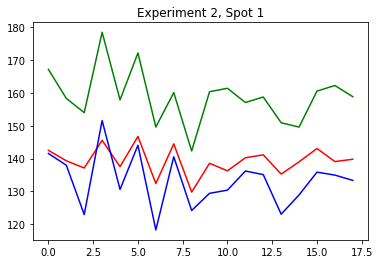

In [122]:
plt.plot(red, 'r-')
plt.plot(green, 'g-')
plt.plot(blue, 'b-')

plt.title('Experiment 2, Spot 1')



In [0]:
#del str
pigs = []
filenames_dict_pigs = {}
str = "./Pigmentation/Pigmentation_photos/Experiment 1/Spot 4"    #photo directory on cloned repository for experimental pigmentation data


for root, dirnames, filenames in os.walk(str): 
    #print(filenames)
    for filename in filenames:   ####remember to update in order to avoid masks###
           # print(filename, "\n")
      #if re.search('d*[^{r|f}].jpg', filename):
            #n =  re.match("(.*)(2019)(\d*_\d*)_(.*)", filename)
            #key = n.group(3)

            #key = datetime.strptime(key, '%m%d_%H%M%S')
           # print(key, " ")
           # print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
            #filenames_dict.update({key: os.path.join(root, filename)})
            #print(filenames_dict, "\n\n")
            n = re.match("(\d*)", filename)
            #print(n.group(), " ")
            #print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
            filenames_dict_pigs.update({int(n.group()): [os.path.join(root, filename), filename]})
            #print(filenames_dict, "\n\n")
#print(filenames_dict.keys(),"\n")
for key in sorted(filenames_dict_pigs.keys()):
  #print(key,filenames_dict[key], "\n")
  image = plt.imread(filenames_dict_pigs[key][0])
  
  pigs+= [image]
  
  
pigs = np.asarray(pigs)

In [0]:
del str
red, green, blue = measure_average_colours(pigs)
red = 255*red
green = 255*green
blue = 255*blue

Text(0.5, 1.0, 'Experiment 1, Spot 4')

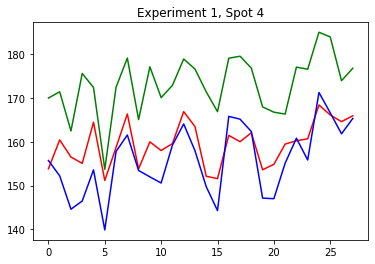

In [125]:
plt.plot(red, 'r-')
plt.plot(green, 'g-')
plt.plot(blue, 'b-')
plt.title('Experiment 1, Spot 4')

In [0]:
pigs = []
filenames_dict = {}
str = "./Pigmentation/Pigmentation_photos/Experiment 2/Spot 4"    #photo directory on cloned repository for experimental pigmentation data


for root, dirnames, filenames in os.walk(str): 
    #print(filenames)
    for filename in filenames:
           # print(filename, "\n")
      #if re.search('d*[^{r|f}].jpg', filename):
            n =  re.match("(.*)(2019)(\d*_\d*)_(.*)", filename)
            if n:
              key = n.group(3)

              key = datetime.strptime(key, '%m%d_%H%M%S')
           # print(key, " ")
           # print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
              filenames_dict.update({key: os.path.join(root, filename)})
            #print(filenames_dict, "\n\n")
#print(filenames_dict.keys(),"\n")
for key in sorted(filenames_dict.keys()):
  #print(key,filenames_dict[key], "\n")
  image = plt.imread(filenames_dict[key])
  #image = skimage.transform.resize(image, (192,256,3))  
  
  pigs+= [image]
  
  
pigs = np.asarray(pigs)

In [0]:
del str
red, green, blue = measure_average_colours(pigs)

Text(0.5, 1.0, 'Experiment 2, Spot 4')

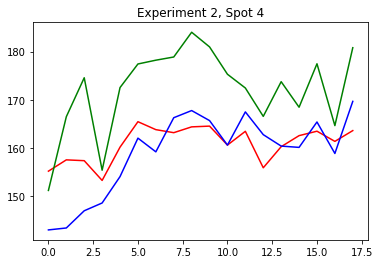

In [128]:
plt.plot(red, 'r-')
plt.plot(green, 'g-')
plt.plot(blue, 'b-')
plt.title('Experiment 2, Spot 4')

In [0]:
pigs = []
filenames_dict = {}
str = "./Pigmentation/Pigmentation_photos/Experiment 2/Spot 2"    #photo directory on cloned repository for experimental pigmentation data


for root, dirnames, filenames in os.walk(str): 
    #print(filenames)
    for filename in filenames:
           # print(filename, "\n")
      #if re.search('d*[^{r|f}].jpg', filename):
            n =  re.match("(.*)(2019)(\d*_\d*)_(.*)", filename)
            if n:
              key = n.group(3)

              key = datetime.strptime(key, '%m%d_%H%M%S')
           # print(key, " ")
           # print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
              filenames_dict.update({key: os.path.join(root, filename)})
            #print(filenames_dict, "\n\n")
#print(filenames_dict.keys(),"\n")
for key in sorted(filenames_dict.keys()):
  #print(key,filenames_dict[key], "\n")
  image = plt.imread(filenames_dict[key])
  #image = skimage.transform.resize(image, (192,256,3))  
  
  pigs+= [image]
  
  
pigs = np.asarray(pigs)

In [0]:
red, green, blue = measure_average_colours(pigs)

Text(0.5, 1.0, 'Experiment 2, Spot 2')

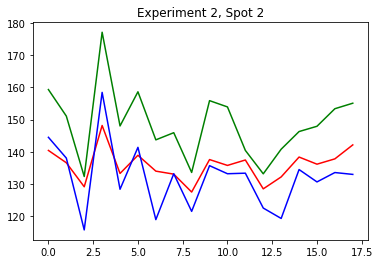

In [131]:
plt.plot(red, 'r-')
plt.plot(green, 'g-')
plt.plot(blue, 'b-')
plt.title('Experiment 2, Spot 2')

In [132]:
red

array([140.46011719, 136.6460319 , 129.21057617, 148.18443034,
       133.33774089, 138.96402344, 134.04751953, 133.11944987,
       127.57585612, 137.63242513, 135.81991862, 137.50223633,
       128.56280924, 132.25640625, 138.40971354, 136.20334635,
       137.84957682, 142.17652344])